In [15]:
print("Hello World!")

Hello World!


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
%matplotlib inline

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")
path+="/Customers.csv"
print("Path to dataset files:", path)

Path to dataset files: /home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


In [18]:
print(path)
sales_data=pd.read_csv(path,index_col='CustomerID')
sales_data

/home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [19]:
def gradient_calc(W,X,b,Y):
    w_gradient_sum=0
    b_gradient_sum=0
    for i in range(X.shape[0]):
        w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
        b_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])
    return w_gradient_sum/len(X),b_gradient_sum/len(X)

In [20]:
def calculate_cost(W,X,b,Y):
    cost=0

    for i in range(X.shape[0]):
        cost+=((np.dot(W,X[i])+b)-Y[i])**2
    return cost/len(X)*2    

In [21]:
def gradient_descent_calc(W,X,b,Y,alpha,error_margin,iterations):
    
    if len(W)==0:
        weights = np.random.rand(X.shape[1])  # Initialize weights with the number of features
    else:
        weights = W

    if len(b) ==0:  
        biases = np.random.rand(1)[0]  
    else:
        biases = b
    print(f"Initial W: {weights} Initial B: {biases}")   
    cost_history=[]
    m,n=X.shape
    iter_count=0
    while iter_count!=iterations:
        cost_value=calculate_cost(weights,X,biases,Y)
        cost_history.append(cost_value)
        if cost_value<=error_margin:
            print("Error margin reached")
            break
        new_w,new_b=gradient_calc(weights,X,biases,Y)
        weights=weights - alpha * new_w
        biases=biases - alpha * new_b
        iter_count+=1
        print(weights,biases,cost_value,iter_count)
    
    
    return weights,biases,cost_history

    

In [22]:
# X_train = np.array([[1], [2], [3], [4]])  # 4 training samples
# Y_train = np.array([2, 3, 5, 7])

# X_train = np.array([[1, 2],
#                     [2, 3],
#                     [3, 4],
#                     [4, 5],
#                     [5, 6]])

# # Corresponding target values
# Y_train = np.array([3, 5, 7, 9, 11])

X_train = np.array([[1**2],  # 1, 1, 1
                    [2**2],  # 4, 8, 16
                    [3**2],  # 9, 27, 81
                    [4**2],  # 16, 64, 256
                    [5**2]]) # 25, 125, 625

# Corresponding target values
Y_train = np.array([2, 3, 4, 5, 6])  # You can set any desired pattern

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,0.00002,0.01,2000)
predicted_x=np.dot(predicted_w,[25**2])+predicted_b
print(f"predicted x is {predicted_x} ")
print(f"line eqn: {predicted_w}x+{predicted_b})")
print(f"final cost is {cost_history[-1]}, predicted w :{predicted_w} and predicted b :{predicted_b}")
# for i in cost_history:
#     print(f"{i}\n")

Initial W: [0.9834273] Initial B: 0.6614390581720163
[0.98055068] 0.6612894753852778 213.3530760227307 1
[0.97768536] 0.6611405284461312 211.69687436176227 2
[0.97483129] 0.6609922148563561 210.05365929538044 3
[0.97198844] 0.6608445321275457 208.42332899134925 4
[0.96915674] 0.6606974777810688 206.8057824159333 5
[0.96633617] 0.6605510493480312 205.2009193276367 6
[0.96352668] 0.6604052443692375 203.60864027099078 7
[0.96072822] 0.6602600603951531 202.0288465703903 8
[0.95794075] 0.6601154949858656 200.4614403239785 9
[0.95516423] 0.6599715457110481 198.90632439758022 10
[0.95239861] 0.6598282101499207 197.36340241868157 11
[0.94964386] 0.6596854858912132 195.83257877045787 12
[0.94689992] 0.659543370533128 194.31375858584815 13
[0.94416676] 0.6594018616833024 192.80684774167585 14
[0.94144433] 0.6592609569587721 191.3117528528156 15
[0.9387326] 0.6591206539859339 189.82838126640632 16
[0.93603152] 0.658980950400509 188.35664105610877 17
[0.93334104] 0.6588418438475062 186.89644101640

[0.59234484] 0.6418174978412466 48.361462927097236 194
[0.59100401] 0.6417543456275394 47.998970001504844 195
[0.58966846] 0.6416914896577658 47.639319267514495 196
[0.58833814] 0.6416289287677992 47.2824884385531 197
[0.58701305] 0.6415666617980861 46.928455402804026 198
[0.58569316] 0.6415046875936282 46.57719822183685 199
[0.58437846] 0.6414430050039646 46.228695129247726 200
[0.58306891] 0.6413816128831537 45.8829245293105 201
[0.58176451] 0.6413205100897555 45.539864995638254 202
[0.58046523] 0.6412596954868144 45.19949526985563 203
[0.57917105] 0.6411991679418407 44.86179426028129 204
[0.57788196] 0.6411389263267939 44.526741040620855 205
[0.57659792] 0.6410789695180649 44.194314848669976 206
[0.57531892] 0.6410192963964583 43.86449508502775 207
[0.57404495] 0.6409599058471755 43.5372613118201 208
[0.57277598] 0.6409007967597975 43.21259325143311 209
[0.57151199] 0.640841968028267 42.89047078525646 210
[0.57025296] 0.640783418550872 42.5708739524366 211
[0.56899888] 0.64072514723

[0.40693438] 0.633831045879146 11.78063247190912 393
[0.40632138] 0.6338088436945021 11.70493502521619 394
[0.40571079] 0.633786776813432 11.629830911394569 395
[0.40510259] 0.6337648447040453 11.555315477926007 396
[0.40449678] 0.6337430468365407 11.481384108774206 397
[0.40389335] 0.6337213826831984 11.408032224098744 398
[0.40329229] 0.6336998517183718 11.335255279971266 399
[0.40269358] 0.633678453418479 11.263048768093892 400
[0.40209722] 0.6336571872619949 11.191408215519811 401
[0.4015032] 0.6336360527294435 11.120329184376079 402
[0.40091152] 0.6336150493033891 11.049807271588604 403
[0.40032215] 0.633594176468429 10.97983810860929 404
[0.3997351] 0.633573433711185 10.910417361145267 405
[0.39915035] 0.6335528205202958 10.841540728890303 406
[0.3985679] 0.6335323363864088 10.773203945258345 407
[0.39798773] 0.6335119808021724 10.705402777119044 408
[0.39740984] 0.6334917532622281 10.638133024535433 409
[0.39683421] 0.6334716532632024 10.57139052050369 410
[0.39626084] 0.6334516

[0.32385169] 0.6315271283082624 4.236935775057253 586
[0.32356455] 0.6315232503943273 4.220345467169547 587
[0.32327853] 0.6315194357285698 4.20388501396584 588
[0.32299364] 0.6315156840621611 4.187553397215629 589
[0.32270987] 0.6315119951472498 4.171349606672697 590
[0.3224272] 0.6315083687369583 4.155272640012507 591
[0.32214564] 0.6315048045853788 4.13932150277009 592
[0.32186519] 0.6315013024475696 4.123495208278406 593
[0.32158584] 0.631497862079551 4.1077927776072 594
[0.32130758] 0.631494483238302 4.092213239502337 595
[0.32103041] 0.6314911656817561 4.07675563032562 596
[0.32075432] 0.6314879091687978 4.061418993995048 597
[0.32047932] 0.6314847134592588 4.04620238192558 598
[0.3202054] 0.6314815783139144 4.031104852970369 599
[0.31993255] 0.6314785034944794 4.016125473362391 600
[0.31966077] 0.6314754887636049 4.0012633166566145 601
[0.31939005] 0.6314725338848743 3.9865174636725733 602
[0.3191204] 0.6314696386227998 3.9718870024373985 603
[0.3188518] 0.6314668027428185 3.957

[0.28477857] 0.6317092584484524 2.5777740064587773 780
[0.2846444] 0.6317139729779557 2.574148126075591 781
[0.28451076] 0.6317187169303299 2.5705504426511476 782
[0.28437763] 0.6317234901896255 2.5669807350872236 783
[0.28424503] 0.6317282926403485 2.5634387840192985 784
[0.28411295] 0.6317331241674585 2.5599243718029627 785
[0.28398138] 0.6317379846563674 2.5564372825004305 786
[0.28385033] 0.6317428739929369 2.5529773018671555 787
[0.28371979] 0.6317477920634772 2.5495442173385543 788
[0.28358975] 0.631752738754745 2.5461378180168337 789
[0.28346023] 0.6317577139539421 2.5427578946579215 790
[0.28333121] 0.6317627175487132 2.5394042396584973 791
[0.2832027] 0.6317677494271444 2.5360766470431293 792
[0.28307469] 0.6317728094777616 2.5327749124515075 793
[0.28294718] 0.6317778975895285 2.5294988331257793 794
[0.28282017] 0.6317830136518451 2.5262482078979804 795
[0.28269365] 0.6317881575545456 2.523022837177581 796
[0.28256763] 0.6317933291878974 2.5198225229390974 797
[0.2824421] 0.6

[0.26624993] 0.6330932999930209 2.2097520146838683 978
[0.26618802] 0.6331020631418927 2.2089655004466437 979
[0.26612634] 0.6331108397368589 2.208184919453879 980
[0.26606491] 0.6331196297247337 2.2074102251845837 981
[0.26600371] 0.6331284330525399 2.2066413714825486 982
[0.26594275] 0.6331372496675084 2.205878312553497 983
[0.26588203] 0.6331460795170778 2.205121002962238 984
[0.26582154] 0.6331549225488927 2.204369397629852 985
[0.26576129] 0.6331637787108038 2.2036234518308992 986
[0.26570128] 0.6331726479508663 2.2028831211906477 987
[0.26564149] 0.6331815302173396 2.2021483616823194 988
[0.26558194] 0.6331904254586864 2.2014191296243704 989
[0.26552262] 0.633199333623572 2.2006953816777743 990
[0.26546353] 0.633208254660863 2.1999770748433396 991
[0.26540467] 0.6332171885196272 2.1992641664590495 992
[0.26534603] 0.6332261351491323 2.198556614197412 993
[0.26528763] 0.6332350944988454 2.1978543760628413 994
[0.26522945] 0.633244066518432 2.1971574103890488 995
[0.2651715] 0.6332

[0.2581837] 0.6348546837005584 2.131065887333647 1159
[0.25815299] 0.6348651861918286 2.130854067442086 1160
[0.25812239] 0.6348756952304411 2.13064367506855 1161
[0.25809191] 0.6348862107903112 2.130434699022948 1162
[0.25806155] 0.6348967328454568 2.13022712820293 1163
[0.2580313] 0.634907261369998 2.1300209515932123 1164
[0.25800117] 0.6349177963381564 2.129816158264877 1165
[0.25797116] 0.6349283377242548 2.1296127373747074 1166
[0.25794126] 0.6349388855027172 2.1294106781645135 1167
[0.25791147] 0.6349494396480675 2.129209969960458 1168
[0.2578818] 0.6349600001349304 2.1290106021724076 1169
[0.25785225] 0.6349705669380297 2.1288125642932663 1170
[0.2578228] 0.6349811400321888 2.1286158458983273 1171
[0.25779347] 0.6349917193923299 2.128420436644628 1172
[0.25776426] 0.6350023049934738 2.1282263262703096 1173
[0.25773515] 0.6350128968107394 2.1280335045939776 1174
[0.25770616] 0.6350234948193432 2.1278419615140747 1175
[0.25767728] 0.6350340989945993 2.127651687008254 1176
[0.25764

[0.25395388] 0.6369999591693449 2.1070489070794833 1354
[0.25393925] 0.6370113493175907 2.106979960189178 1355
[0.25392468] 0.6370227424551743 2.10691132119418 1356
[0.25391017] 0.6370341385699888 2.1068429876837227 1357
[0.25389571] 0.637045537649975 2.106774957265947 1358
[0.2538813] 0.6370569396831208 2.106707227567744 1359
[0.25386695] 0.6370683446574618 2.1066397962346177 1360
[0.25385265] 0.6370797525610801 2.1065726609305324 1361
[0.25383841] 0.6370911633821048 2.1065058193377695 1362
[0.25382422] 0.6371025771087119 2.1064392691567857 1363
[0.25381008] 0.6371139937291234 2.1063730081060674 1364
[0.25379599] 0.6371254132316078 2.1063070339219943 1365
[0.25378196] 0.6371368356044798 2.106241344358692 1366
[0.25376798] 0.6371482608360998 2.1061759371878983 1367
[0.25375405] 0.637159688914874 2.1061108101988246 1368
[0.25374018] 0.6371711198292541 2.106045961198016 1369
[0.25372635] 0.6371825535677375 2.1059813880092184 1370
[0.25371258] 0.6371939901188661 2.10591708847324 1371
[0.2

[0.251948] 0.6392181006389716 2.0974884946806593 1545
[0.25194074] 0.6392298877169674 2.097450125045174 1546
[0.25193351] 0.6392416761556188 2.097411824214661 1547
[0.25192631] 0.6392534659492174 2.09737359165313 1548
[0.25191913] 0.6392652570920774 2.0973354268287983 1549
[0.25191198] 0.6392770495785354 2.09729732921405 1550
[0.25190485] 0.6392888434029502 2.0972592982854055 1551
[0.25189774] 0.6393006385597029 2.0972213335234935 1552
[0.25189067] 0.6393124350431963 2.0971834344130107 1553
[0.25188361] 0.6393242328478557 2.0971456004427003 1554
[0.25187659] 0.6393360319681278 2.0971078311053075 1555
[0.25186958] 0.6393478323984815 2.097070125897561 1556
[0.25186261] 0.6393596341334072 2.0970324843201316 1557
[0.25185565] 0.6393714371674172 2.096994905877607 1558
[0.25184872] 0.639383241495045 2.096957390078462 1559
[0.25184182] 0.6393950471108458 2.096919936435021 1560
[0.25183494] 0.6394068540093963 2.096882544463434 1561
[0.25182809] 0.6394186621852943 2.096845213683648 1562
[0.2518

[0.25094086] 0.6414647157541468 2.091031573997141 1734
[0.25093705] 0.6414766794704444 2.0910000378494416 1735
[0.25093326] 0.6414886437849304 2.0909685175901958 1736
[0.25092948] 0.6415006086948923 2.090937013098344 1737
[0.25092571] 0.6415125741976284 2.0909055242537717 1738
[0.25092195] 0.6415245402904475 2.0908740509373103 1739
[0.2509182] 0.641536506970669 2.0908425930307195 1740
[0.25091447] 0.641548474235623 2.0908111504166946 1741
[0.25091075] 0.6415604420826498 2.090779722978842 1742
[0.25090704] 0.6415724105091004 2.0907483106016875 1743
[0.25090334] 0.641584379512336 2.0907169131706573 1744
[0.25089965] 0.6415963490897284 2.090685530572081 1745
[0.25089598] 0.6416083192386595 2.0906541626931734 1746
[0.25089232] 0.6416202899565216 2.09062280942204 1747
[0.25088867] 0.6416322612407174 2.0905914706476576 1748
[0.25088503] 0.6416442330886595 2.090560146259878 1749
[0.2508814] 0.6416562054977708 2.0905288361494163 1750
[0.25087778] 0.6416681784654844 2.0904975402078403 1751
[0.2

[0.25038811] 0.6437700757849139 2.0851671989869347 1926
[0.25038596] 0.6437821149998976 2.0851372837041575 1927
[0.25038381] 0.6437941544469304 2.0851073722758655 1928
[0.25038168] 0.6438061941247389 2.085077464675351 1929
[0.25037954] 0.6438182340320545 2.0850475608761134 1930
[0.25037742] 0.6438302741676135 2.085017660851859 1931
[0.2503753] 0.6438423145301574 2.0849877645765034 1932
[0.25037318] 0.6438543551184325 2.0849578720241633 1933
[0.25037107] 0.6438663959311901 2.084927983169158 1934
[0.25036897] 0.6438784369671864 2.0848980979860112 1935
[0.25036687] 0.6438904782251824 2.084868216449445 1936
[0.25036478] 0.6439025197039442 2.08483833853438 1937
[0.25036269] 0.6439145614022425 2.0848084642159312 1938
[0.25036061] 0.6439266033188528 2.0847785934694096 1939
[0.25035853] 0.6439386454525556 2.0847487262703237 1940
[0.25035646] 0.6439506878021363 2.0847188625943676 1941
[0.2503544] 0.6439627303663847 2.0846890024174307 1942
[0.25035234] 0.6439747731440957 2.0846591457155887 1943


In [23]:
print(type(np.random.rand(2)))
X_train.shape

<class 'numpy.ndarray'>


(5, 1)

In [24]:
def sigmoid(f_x):
    return 1/(1+np.exp(-(f_x)))

In [25]:
def logistic_cf(W,X,y,b):
    cost=0
    m,n=X.shape
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        cost+= y[i] * (np.log(g_x)) + (1-y[i]) * (np.log(1-(g_x)))
    cost=(-1/m)*cost
    return cost

In [26]:
def logistic_gradient(W,X,y,b):
    m=X.shape[0]
    gradient_w=0
    gradient_b=0
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        gradient_w+=(g_x-y[i])*X[i]
        gradient_b+=(g_x-y[i])
    return (1/m)*gradient_w,(1/m)*gradient_b

In [27]:
def logistic_gradient_descent(W,X,y,b,iterations,alpha,error_margin):
    m,n=X.shape
    
    if len(W)==0:
        W=np.random.rand(n)   
    
    if len(b)==0:
        b=np.random.rand(1)[0]
    cost_history=[]
        
    iter_count=0
    while iter_count<iterations:
        current_cost=logistic_cf(W,X,y,b)
        cost_history.append(current_cost)
        if current_cost>error_margin:
            grad_w,grad_b=logistic_gradient(W,X,y,b)
            W=W-alpha*grad_w
            b=b-alpha*grad_b
            iter_count+=1

        else:
            break
    return W,b,cost_history        

In [28]:
# X = np.array([
#     [2, 3],    # Sample 1: Will fail (0)
#     [3, 4],    # Sample 2: Will fail (0) 
#     [4, 5],    # Sample 3: Will fail (0)
#     [5, 3],    # Sample 4: Will pass (1)
#     [6, 4],    # Sample 5: Will pass (1)
#     [7, 5],    # Sample 6: Will pass (1)
#     [3, 6],    # Sample 7: Will fail (0)
#     [4, 7],    # Sample 8: Will pass (1)
#     [5, 6],    # Sample 9: Will pass (1)
#     [6, 3]     # Sample 10: Will pass (1)
# ])

# # Labels y
# y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

#############################################################################################
# X_below_boundary = np.column_stack((np.random.uniform(0, 4, 20), np.random.uniform(0, 20, 20)))
# X_above_boundary = np.column_stack((np.random.uniform(4, 8, 20), np.random.uniform(0, 20, 20)))

# # Combine data and labels
# X = np.vstack((X_below_boundary, X_above_boundary))
# y = np.array([0] * 20 + [1] * 20)

# # Shuffle data to ensure it's not ordered
# shuffled_indices = np.random.permutation(len(X))
# X, y = X[shuffled_indices], y[shuffled_indices]
#############################################################################################



X = np.array([[2, 1], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], 
              [2, 4], [3, 5], [4, 4], [5, 6], [6, 5], [7, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


W,b,cost_history=logistic_gradient_descent([],X,y,[],6000,0.1,0.0001)
# for i,j in enumerate(cost_history):
#     print(f' Cost : {j} iteration {i+1}')

In [29]:
def pred_logistic_regression(calculated_w,calculated_b,X):
    probability_value=sigmoid(pred_linear_regression(calculated_w,calculated_b,X))
    return True if probability_value>0.5 else False

In [30]:
def pred_linear_regression(calculated_w,calculated_b,X):
    return np.dot(calculated_w,X)+calculated_b

In [31]:
test_value=np.array([2,5])
inferred_x=np.dot(W,test_value)+b
pred=sigmoid(inferred_x)
# print(W,b)
if pred>=0.5:
    print("Passes Exam")
else:
    print("Fails exam")

# Visualization of decision boundary when only two features are present 
decision_boundary= [(x_1,(- (b + W[0] * x_1) / W[1])) for x_1 in range(8) ]
db_x=[i for i,j in decision_boundary]
db_y=[j for i,j in decision_boundary]
# print(decision_boundary)

Passes Exam


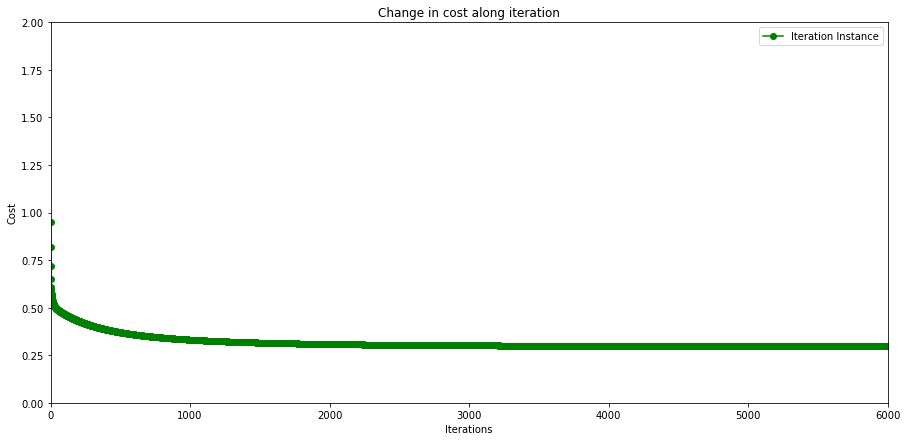

In [32]:
plt.figure(figsize=(15,7)) # must be declared first
plt.plot([i for i in range(len(cost_history))],cost_history,'go-',label='Iteration Instance')
plt.title('Change in cost along iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.xlim(0, 6000) #value limits 
plt.ylim(0, 2) #value limits

plt.show()

(0.0, 20.0)

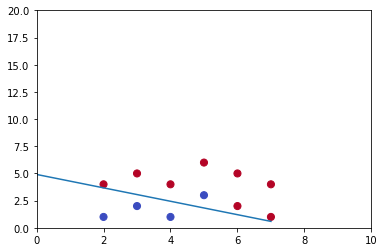

In [33]:
np
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.plot(db_x,db_y)
plt.xlim(0, 10) #value limits 
plt.ylim(0, 20) #value limits


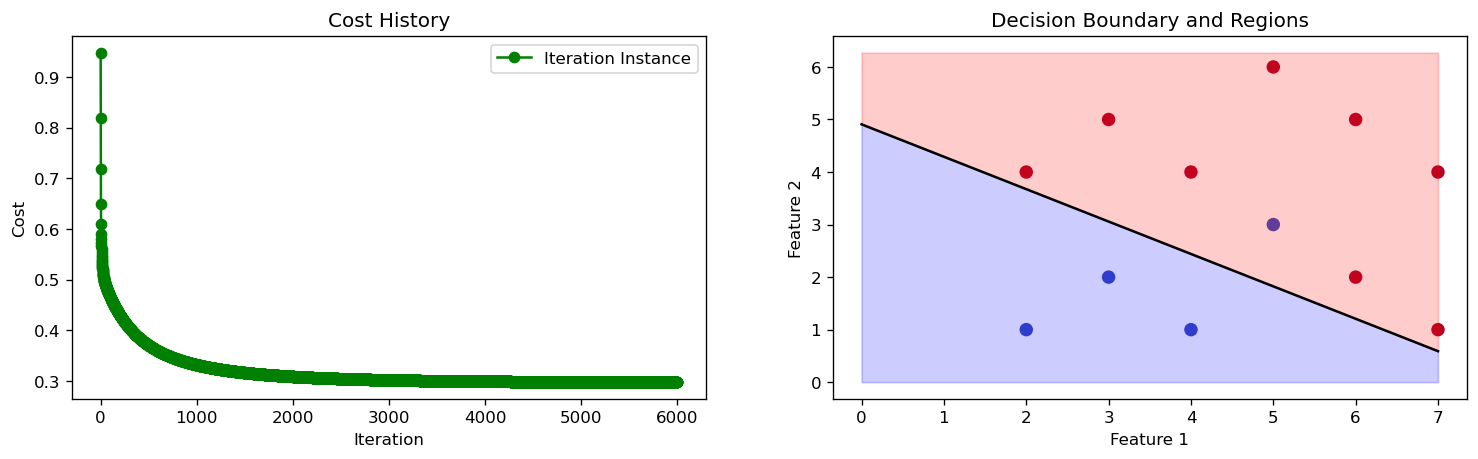

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), dpi=120)

# Plot the cost history (iterations vs cost)
ax1.plot([i for i in range(len(cost_history))], cost_history, 'go-', label='Iteration Instance')
ax1.set_title('Cost History')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

# Scatter plot of data points and decision boundary
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Data Points')

# Plot decision boundary
db_x = np.array(db_x)  # X coordinates of the decision boundary
db_y = np.array(db_y)  # Y coordinates of the decision boundary
ax2.plot(db_x, db_y, 'k-', label='Decision Boundary')

# Fill regions based on the decision boundary
# Above the boundary -> Class 1 Region
ax2.fill_between(db_x, db_y, y2=ax2.get_ylim()[1], color='red', alpha=0.2, label='Class 1 Region')
#fill from y1 to y2
# Below the boundary -> Class 2 Region
ax2.fill_between(db_x, db_y,   color='blue', alpha=0.2, label='Class 2 Region')
# Configure plot aesthetics
ax2.set_title('Decision Boundary and Regions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
# ax1.xlim(0,5000)
# ax1.ylim(0,2)
# ax1. 
# plt.tight_layout()
plt.show()


In [35]:
sales_data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [36]:
new_sales=sales_data[['Annual Income ($)','Family Size']]

spending_score=sales_data[['Spending Score (1-100)']]



#standardized values for training
X_mean=(new_sales.mean())
X_std=new_sales.std()
X_standardized=(new_sales-X_mean)/X_std

#transforming into numpy
X_train=X_standardized.to_numpy()
Y_train=spending_score.to_numpy()
Y_train=Y_train.reshape(-1)

<AxesSubplot:>

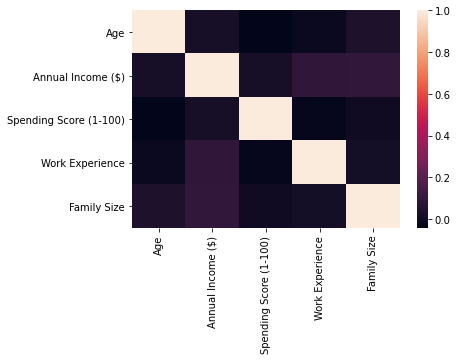

In [40]:

numeric_data=sales_data.drop(['Profession','Gender'],axis=1)
# new_sales=sales_data[['Annual Income ($)','Work Experience']]
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix)

Initial W: [0.25757142 0.38599152] Initial B: 0.33666621018221765
[0.32901374 0.31650729] 10.461832968145776 6685.561240208067 1
[0.38746658 0.25958471] 18.56196637451661 4840.0385735059 2
[0.43529298 0.21295422] 25.042073099613308 3658.898603587406 3
[0.47442583 0.17475599] 30.226158479690646 2902.965361017095 4
[0.50644619 0.14346604] 34.373426783752514 2419.1656313766757 5
[0.53264742 0.11783563] 37.69124142700202 2109.5321593109556 6
[0.55408754 0.09684161] 40.345493141601615 1911.3656345397092 7
[0.57163209 0.07964569] 42.46889451328129 1784.5383196204132 8
[0.58598919 0.06556105] 44.167615610625035 1703.3683427036665 9
[0.59773816 0.05402501] 45.52659248850003 1651.419225450134 10
[0.60735299 0.04457659] 46.61377399080002 1618.17156786297 11
[0.61522148 0.03683815] 47.48351919264002 1596.8929178439384 12
[0.62166093 0.03050033] 48.17931535411201 1583.2744818534686 13
[0.62693096 0.02530973] 48.73595228328961 1574.5586158080687 14
[0.63124401 0.02105875] 49.18126182663169 1568.980

[0.65069035 0.00183443] 50.96249999999346 1559.0633644678041 133
[0.65069035 0.00183443] 50.96249999999477 1559.0633644678041 134
[0.65069035 0.00183443] 50.96249999999581 1559.0633644678048 135
[0.65069035 0.00183443] 50.96249999999665 1559.0633644678023 136
[0.65069035 0.00183443] 50.96249999999732 1559.0633644677991 137
[0.65069035 0.00183443] 50.96249999999785 1559.0633644678016 138
[0.65069035 0.00183443] 50.96249999999828 1559.0633644677998 139
[0.65069035 0.00183443] 50.96249999999862 1559.0633644678012 140
[0.65069035 0.00183443] 50.9624999999989 1559.0633644678023 141
[0.65069035 0.00183443] 50.96249999999912 1559.0633644678007 142
[0.65069035 0.00183443] 50.962499999999295 1559.063364467802 143
[0.65069035 0.00183443] 50.96249999999944 1559.0633644678028 144
[0.65069035 0.00183443] 50.96249999999955 1559.063364467803 145
[0.65069035 0.00183443] 50.96249999999964 1559.063364467805 146
[0.65069035 0.00183443] 50.962499999999714 1559.063364467805 147
[0.65069035 0.00183443] 50.9

[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 261
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 262
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 263
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 264
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 265
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 266
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 267
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 268
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 269
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 270
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 271
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 272
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 273
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 274
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 275
[0.6506903

[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 387
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 388
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 389
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 390
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 391
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 392
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 393
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 394
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 395
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 396
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 397
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 398
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 399
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 400
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 401
[0.6506903

[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 513
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 514
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 515
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 516
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 517
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 518
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 519
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 520
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 521
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 522
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 523
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 524
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 525
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 526
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 527
[0.6506903

[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 638
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 639
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 640
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 641
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 642
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 643
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 644
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 645
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 646
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 647
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 648
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 649
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 650
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 651
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 652
[0.6506903

[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 766
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 767
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 768
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 769
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 770
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 771
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 772
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 773
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 774
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 775
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 776
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 777
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 778
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 779
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 780
[0.6506903

[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 891
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 892
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 893
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 894
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 895
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 896
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 897
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 898
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 899
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 900
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 901
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 902
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 903
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 904
[0.65069035 0.00183443] 50.962499999999984 1559.0633644678044 905
[0.6506903

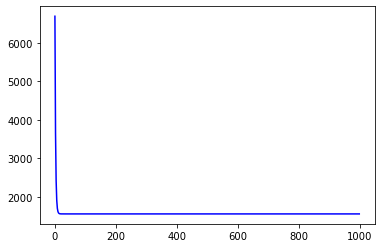

In [38]:

# predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,alpha=0.2,error_margin=0.01,iterations=1000)
# plt.plot([i for i in range(len(cost_history))],cost_history,'b')
# plt.show()